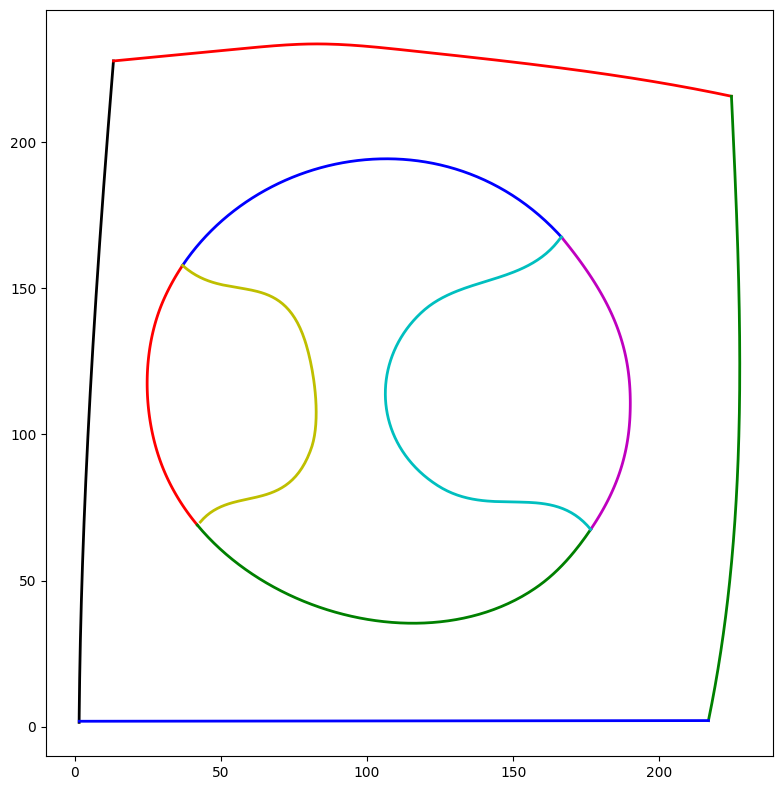

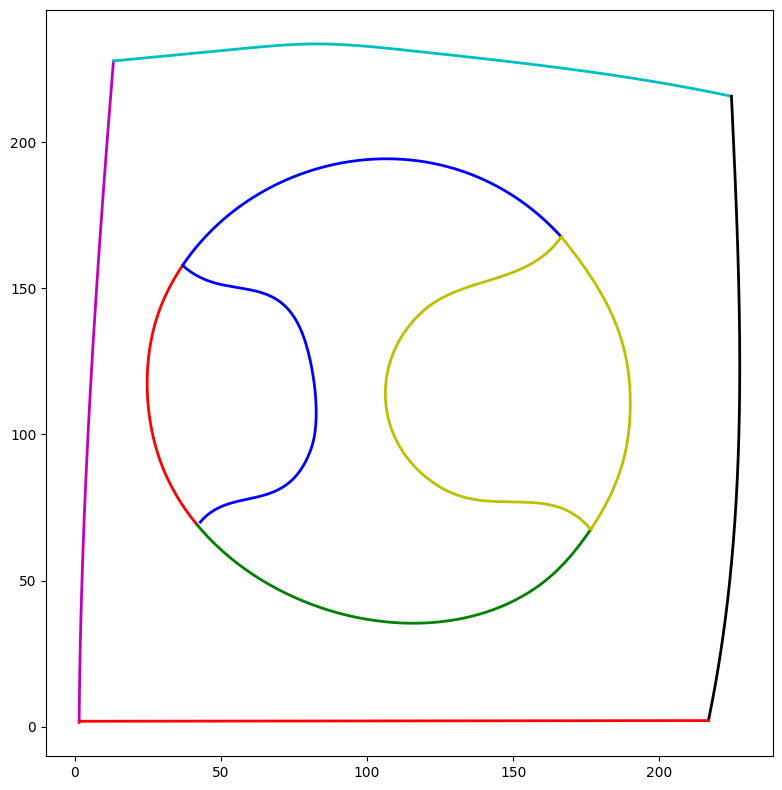

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to read CSV
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Function to plot polylines
def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['r', 'g', 'b', 'y', 'm', 'c', 'k']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

# Load and visualize frag0.csv
frag0_path = '/content/drive/MyDrive/problems/frag0.csv'
paths_XYs_frag0 = read_csv(frag0_path)
plot(paths_XYs_frag0)

# Load and visualize frag1.csv
frag1_path = '/content/drive/MyDrive/problems/frag1.csv'
paths_XYs_frag1 = read_csv(frag1_path)
plot(paths_XYs_frag1)


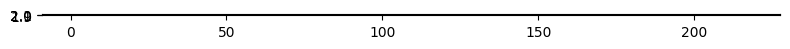

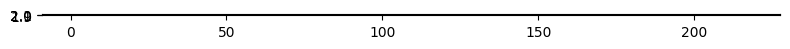

In [ ]:
from sklearn.linear_model import LinearRegression

# Function to detect straight lines
def detect_straight_lines(paths_XYs):
    straight_lines = []
    for path in paths_XYs:
        for XY in path:
            if len(XY) > 2:
                model = LinearRegression().fit(XY[:, 0].reshape(-1, 1), XY[:, 1])
                score = model.score(XY[:, 0].reshape(-1, 1), XY[:, 1])
                if score > 0.99:  # Threshold for linearity
                    straight_lines.append(XY)
    return straight_lines

# Example usage
straight_lines_frag0 = detect_straight_lines(paths_XYs_frag0)
plot([straight_lines_frag0])

straight_lines_frag1 = detect_straight_lines(paths_XYs_frag1)
plot([straight_lines_frag1])


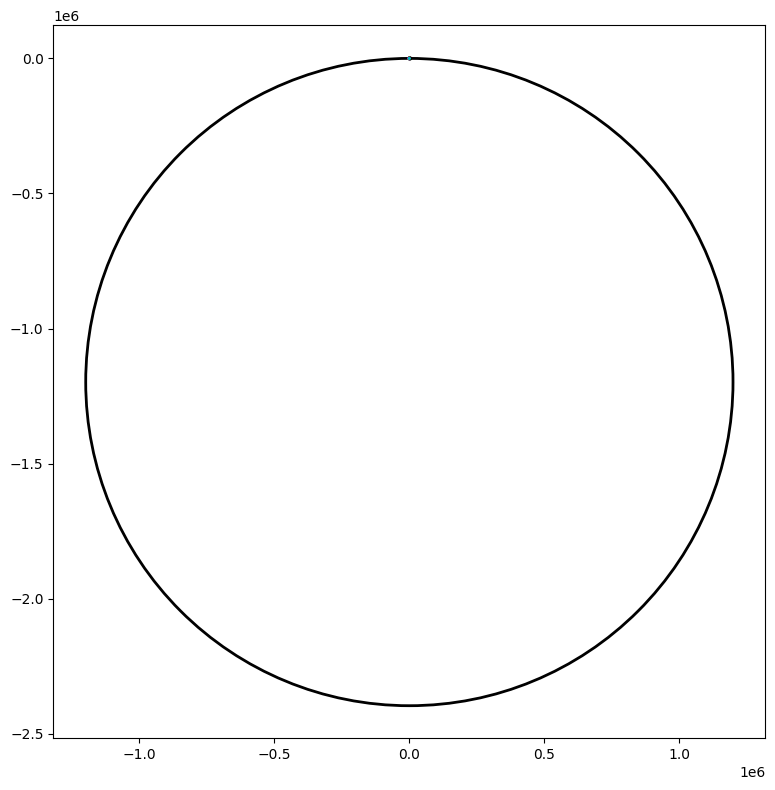

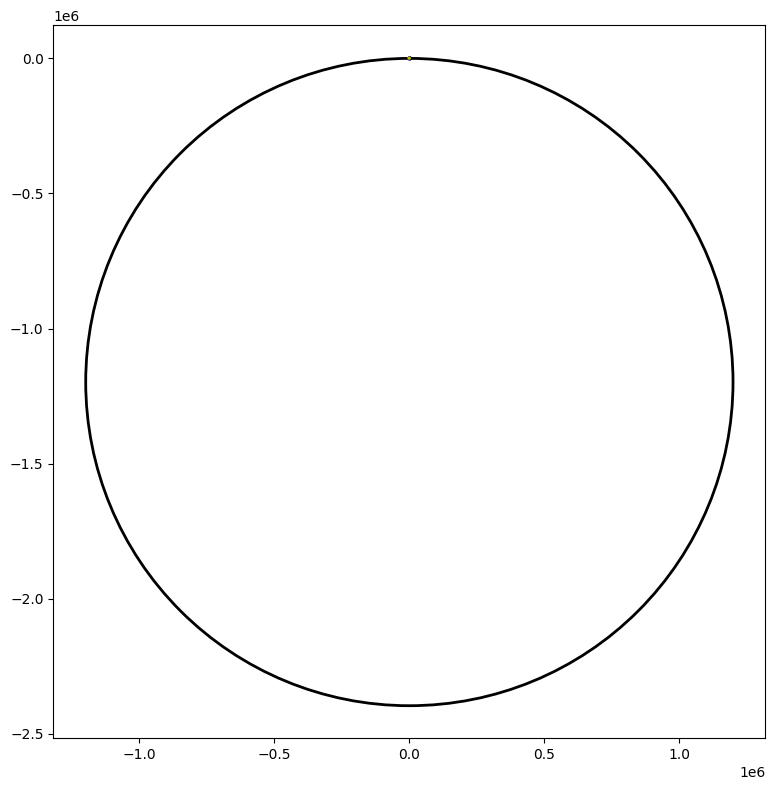

In [ ]:
import numpy as np
from scipy.optimize import least_squares

# Function to fit a circle to points
def fit_circle(XY):
    # Initial guess for circle parameters: (x_center, y_center, radius)
    x_m = np.mean(XY[:, 0])
    y_m = np.mean(XY[:, 1])
    initial_guess = [x_m, y_m, np.std(XY[:, 0])]

    # Define the function to minimize
    def residuals(params):
        xc, yc, r = params
        return np.sqrt((XY[:, 0] - xc)**2 + (XY[:, 1] - yc)**2) - r

    result = least_squares(residuals, initial_guess)
    return result.x  # Circle parameters (x_center, y_center, radius)

# Function to detect circles
def detect_circles(paths_XYs):
    circles = []
    for path in paths_XYs:
        for XY in path:
            if len(XY) > 3:  # At least 4 points needed to fit a circle
                xc, yc, r = fit_circle(XY)
                # Validate the circle (e.g., by checking residuals)
                residuals = np.sqrt((XY[:, 0] - xc)**2 + (XY[:, 1] - yc)**2) - r
                if np.mean(np.abs(residuals)) < 1:  # Threshold for fitting accuracy
                    circles.append((xc, yc, r))
    return circles

# Function to plot detected circles
def plot_circles(paths_XYs, circles):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['r', 'g', 'b', 'y', 'm', 'c', 'k']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    for xc, yc, r in circles:
        circle = plt.Circle((xc, yc), r, color='black', fill=False, linewidth=2)
        ax.add_patch(circle)
    ax.set_aspect('equal')
    plt.show()

# Example usage
circles_frag0 = detect_circles(paths_XYs_frag0)
plot_circles(paths_XYs_frag0, circles_frag0)

circles_frag1 = detect_circles(paths_XYs_frag1)
plot_circles(paths_XYs_frag1, circles_frag1)


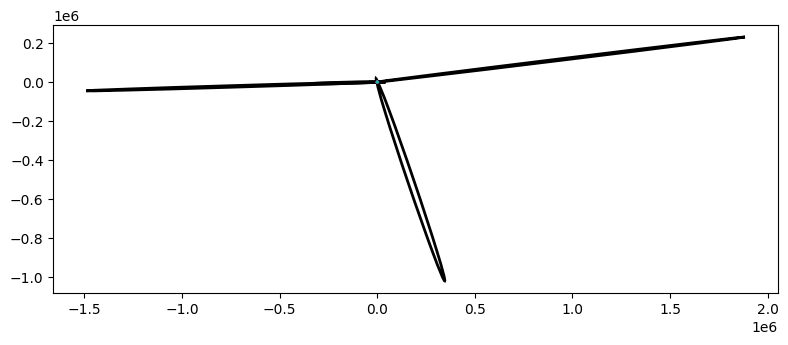

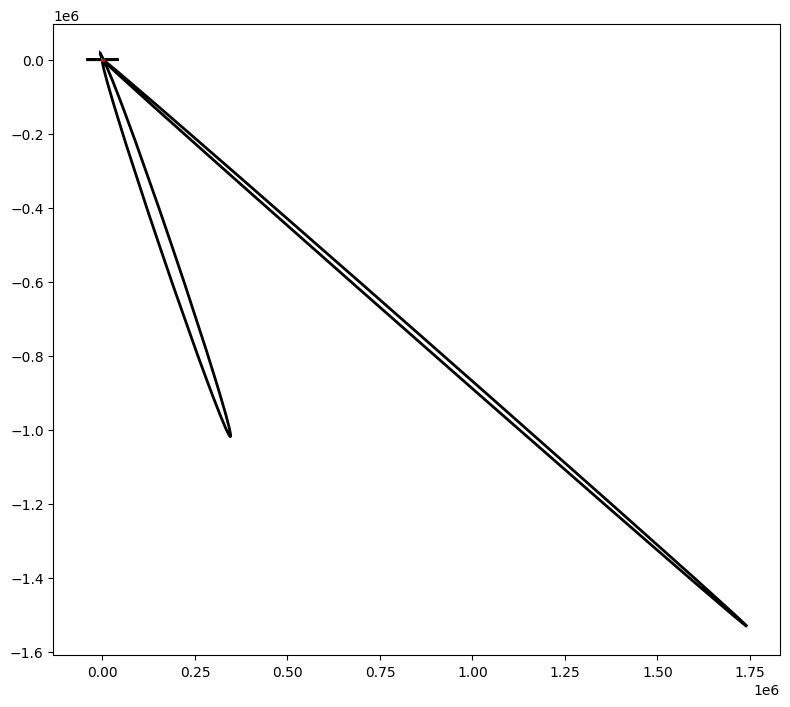

In [ ]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Function to fit an ellipse to points
def fit_ellipse(XY):
    # Ellipse fitting using least squares
    def ellipse_residuals(params, x, y):
        xc, yc, a, b, theta = params
        cos_t, sin_t = np.cos(theta), np.sin(theta)
        x_centered, y_centered = x - xc, y - yc
        x_rot = cos_t * x_centered + sin_t * y_centered
        y_rot = -sin_t * x_centered + cos_t * y_centered
        return (x_rot / a)**2 + (y_rot / b)**2 - 1

    x_m = np.mean(XY[:, 0])
    y_m = np.mean(XY[:, 1])
    initial_guess = [x_m, y_m, np.std(XY[:, 0]), np.std(XY[:, 1]), 0]

    result = least_squares(ellipse_residuals, initial_guess, args=(XY[:, 0], XY[:, 1]))
    return result.x  # Ellipse parameters (x_center, y_center, a, b, theta)

# Function to detect ellipses
def detect_ellipses(paths_XYs):
    ellipses = []
    def ellipse_residuals(params, x, y):
        xc, yc, a, b, theta = params
        cos_t, sin_t = np.cos(theta), np.sin(theta)
        x_centered, y_centered = x - xc, y - yc
        x_rot = cos_t * x_centered + sin_t * y_centered
        y_rot = -sin_t * x_centered + cos_t * y_centered
        return (x_rot / a)**2 + (y_rot / b)**2 - 1

    for path in paths_XYs:
        for XY in path:
            if len(XY) > 4:  # At least 5 points needed to fit an ellipse
                xc, yc, a, b, theta = fit_ellipse(XY)
                residuals = ellipse_residuals([xc, yc, a, b, theta], XY[:, 0], XY[:, 1])
                if np.mean(np.abs(residuals)) < 1:  # Threshold for fitting accuracy
                    ellipses.append((xc, yc, a, b, theta))
    return ellipses

# Function to plot detected ellipses
def plot_ellipses(paths_XYs, ellipses):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['r', 'g', 'b', 'y', 'm', 'c', 'k']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    for xc, yc, a, b, theta in ellipses:
        ellipse = Ellipse((xc, yc), 2*a, 2*b, angle=np.degrees(theta), edgecolor='black', facecolor='none', linewidth=2)
        ax.add_patch(ellipse)
    ax.set_aspect('equal')
    plt.show()

# Example usage
ellipses_frag0 = detect_ellipses(paths_XYs_frag0)
plot_ellipses(paths_XYs_frag0, ellipses_frag0)

ellipses_frag1 = detect_ellipses(paths_XYs_frag1)
plot_ellipses(paths_XYs_frag1, ellipses_frag1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install numpy matplotlib scipy scikit-learn

In [ ]:
!pip install svgwrite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.6 MB/s eta 0:00:00


In [ ]:
pip install tensorflow opencv-python matplotlib tensorflow_hub


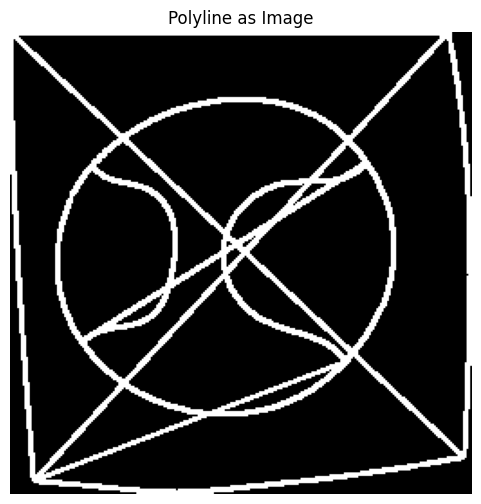

OSError: https://tfhub.dev/google/pix2pix/1 does not appear to be a valid module.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import tensorflow_hub as hub

# Step 1: Load the CSV file and extract polylines
def load_csv(file_path):
    csv_data = pd.read_csv(file_path)
    x_coords = csv_data.iloc[:, 2]
    y_coords = csv_data.iloc[:, 3]
    return x_coords, y_coords

# Step 2: Convert polylines to an image
def polyline_to_image(x_coords, y_coords, image_size=256):
    canvas = np.zeros((image_size, image_size), dtype=np.uint8)
    x_normalized = (x_coords - x_coords.min()) / (x_coords.max() - x_coords.min()) * (image_size - 1)
    y_normalized = (y_coords - y_coords.min()) / (y_coords.max() - y_coords.min()) * (image_size - 1)
    points = np.array(list(zip(x_normalized.astype(int), y_normalized.astype(int))))
    cv2.polylines(canvas, [points], isClosed=False, color=255, thickness=2)
    return canvas

# Step 3: Load pretrained Pix2Pix model
def load_pix2pix_model():
    model = hub.load('https://tfhub.dev/google/pix2pix/1')
    return model

# Step 4: Generate smooth images using the Pix2Pix model
def generate_smooth_image(model, input_image):
    input_image = tf.expand_dims(tf.image.convert_image_dtype(input_image, tf.float32), axis=0)
    output_image = model(input_image)
    output_image_np = output_image[0].numpy() * 255.0
    return output_image_np.astype(np.uint8)

# Step 5: Convert smoothed image back to polylines (using contour finding)
def image_to_polylines(smoothed_image):
    contours, _ = cv2.findContours(smoothed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    polylines = [contour.squeeze() for contour in contours]
    return polylines

# Step 6: Save results
def save_results(smoothed_image, polylines, image_path, csv_path):
    cv2.imwrite(image_path, smoothed_image)
    with open(csv_path, 'w') as file:
        for polyline in polylines:
            for point in polyline:
                file.write(f"{point[0]},{point[1]}\n")
            file.write("\n")

# Main function to execute the steps
def main():
    file_path = '/content/drive/MyDrive/problems/frag1.csv'  # Replace with your file path
    x_coords, y_coords = load_csv(file_path)

    # Convert polylines to an image
    polyline_image = polyline_to_image(x_coords, y_coords)

    # Display the original polyline image
    plt.figure(figsize=(6, 6))
    plt.imshow(polyline_image, cmap='gray')
    plt.title('Polyline as Image')
    plt.axis('off')
    plt.show()

    # Load the Pix2Pix model
    model = load_pix2pix_model()

    # Generate smooth image
    smoothed_image = generate_smooth_image(model, polyline_image)

    # Display the smoothed image
    plt.figure(figsize=(6, 6))
    plt.imshow(smoothed_image, cmap='gray')
    plt.title('Smoothed Polyline Image')
    plt.axis('off')
    plt.show()

    # Convert smoothed image back to polylines
    polylines = image_to_polylines(smoothed_image)

    # Save the smoothed image and polylines
    save_results(smoothed_image, polylines, 'smoothed_polyline.png', 'smoothed_polyline.csv')

if __name__ == "__main__":
    main()


In [ ]:
/content/drive/MyDrive/problems/frag1.csv

In [ ]:
import pandas as pd

# Load and inspect the CSV file
csv_path = '/content/drive/MyDrive/problems/frag1.csv'
df = pd.read_csv(csv_path)
print(df.head())
print(df.columns)


   0.000000000000000000e+00  0.000000000000000000e+00.1  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   

   4.194200134277343750e+01  6.898000335693359375e+01  
0                 41.259605                 69.811707  
1                 40.588753                 70.652374  
2                 39.929607                 71.501953  
3                 39.282337                 72.360405  
4                 38.647114                 73.227669  
Index(['0.000000000000000000e+00', '0.000000000000000000e+00.1',
       '4.194200134277343750e+01', '6.898000335693359375e+01'],
      dtype='object')
